<a href="https://colab.research.google.com/github/yesojeda/Diplomatura-BA-UDA/blob/main/Modulo8/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

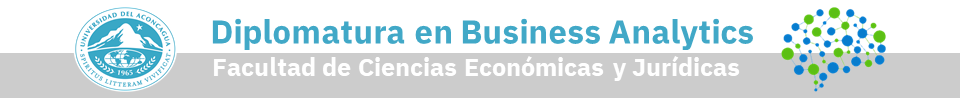

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 8

</font>
</center>

~~~
Ojeda Yésica
~~~

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# **Creación del DataFrame**

In [2]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/main/Gestion_y_Procesamiento_BD/"
archivo="bank-full.csv"
analisis = pd.read_csv(url+archivo)
analisis.replace({"unknown": np.nan}, inplace=True)

El data frame es sobre el historico de un Banco para conocer la tendencia de la subscripción de plazos fijos

# **Análisis Exploratorio de los datos**

## Visualización del conjunto de datos

In [3]:
analisis.head()

age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0      NaN  no
1   44    technician   single  secondary  ...    -1         0      NaN  no
2   33  entrepreneur  married  secondary  ...    -1         0      NaN  no
3   47   blue-collar  married        NaN  ...    -1         0      NaN  no
4   33           NaN   single        NaN  ...    -1         0      NaN  no

[5 rows x 17 columns]

In [4]:
fig1 = px.scatter(analisis, x="balance", 
                y="duration",
                color="loan")
fig1.show()

In [5]:
fig2 = px.scatter(analisis, x="balance", 
           y="month",
           color="age",
           template="gridon",
          # marginal_x="histogram",
           marginal_y="violin",
           labels={"balance","month"})

fig2.show()

## Tipos de datos

In [63]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Dimensión del conjunto de datos y valores nulos y faltantes

In [64]:
analisis.size

768587

In [65]:
analisis.shape

(45211, 17)

In [67]:
analisis.isna().sum().sort_values() # Cantidad de datos ausentes por variable del DataFrame

age              0
previous         0
pdays            0
campaign         0
duration         0
month            0
day              0
y                0
housing          0
balance          0
default          0
marital          0
loan             0
job            288
education     1857
contact      13020
poutcome     36959
dtype: int64

En "job" y "education", se reemplazrára por "No ID" los datos faltantes, ya que solo el 0.63% es lo que falta en "job" y  4% para "education"



In [68]:
analisis= analisis.drop(analisis.columns[[8,15]], axis='columns')
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [114]:
analisis.isna().sum().sort_values()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [116]:
analisis.head()

age           job  marital  education  ... campaign  pdays previous   y
0   58    management  married   tertiary  ...        1     -1        0  no
1   44    technician   single  secondary  ...        1     -1        0  no
2   33  entrepreneur  married  secondary  ...        1     -1        0  no
3   47   blue-collar  married      No ID  ...        1     -1        0  no
4   33         No ID   single      No ID  ...        1     -1        0  no

[5 rows x 15 columns]

## Variable Objetivo

In [ ]:
# la elijo yo sino viene dada, según la pregunta de negocio que quiera plantear

## Variables numéricas, análisis descriptivo

Voy a realizar una clasificación (modelo no supervisado)

In [141]:
round(analisis.select_dtypes(include=["float64", "int"]).describe(),2)

age    balance       day  duration  campaign     pdays  previous
count  45211.00   45211.00  45211.00  45211.00  45211.00  45211.00  45211.00
mean      40.94    1362.27     15.81    258.16      2.76     40.20      0.58
std       10.62    3044.77      8.32    257.53      3.10    100.13      2.30
min       18.00   -8019.00      1.00      0.00      1.00     -1.00      0.00
25%       33.00      72.00      8.00    103.00      1.00     -1.00      0.00
50%       39.00     448.00     16.00    180.00      2.00     -1.00      0.00
75%       48.00    1428.00     21.00    319.00      3.00     -1.00      0.00
max       95.00  102127.00     31.00   4918.00     63.00    871.00    275.00

## Otras variables, análisis descriptivo

In [84]:
analisis.select_dtypes(include=["object"]).describe()

job  marital  education default housing   loan  month      y
count         45211    45211      45211   45211   45211  45211  45211  45211
unique           12        3          4       2       2      2     12      2
top     blue-collar  married  secondary      no     yes     no    may     no
freq           9732    27214      23202   44396   25130  37967  13766  39922

## Correlación de variables

In [40]:
correlation_matrix = analisis.select_dtypes(include=['float64', 'int']).corr(method='pearson')
correlation_matrix


age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000

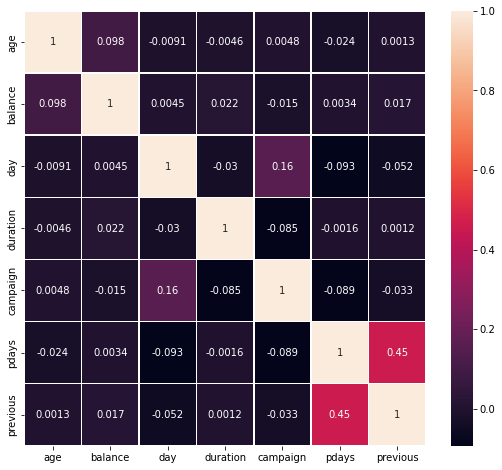

In [22]:
plt.figure(figsize=(9,8))
sns.heatmap(correlation_matrix, 
            annot=True,
            linewidths=.5)

plt.show()

## Graficos de variables

In [87]:
fig1 = px.scatter(analisis, x="campaign", 
           y="day",
           color="previous",
           template="gridon",
           marginal_x="violin",
           marginal_y="histogram",
           labels={"campaign","day"})

fig1.show()

##AUTO EDA

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
#pip install pandas-profiling

In [7]:
import pandas as pd
import pandas_profiling

In [8]:
report = pandas_profiling.ProfileReport(analisis)
report.to_file("report.html")

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
analisis.profile_report()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **División del conjunto de datos**

In [132]:
y = analisis["day"] # variable objetivo
X = analisis.drop(columns=["day"]) # vector de entrada

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [134]:
X_train.shape

(36168, 16)

In [135]:
X_test.shape

(9043, 16)

In [136]:
y_train.shape

(36168,)

In [137]:
y_test.shape

(9043,)

# **Preprocesamiento**

## Imputación de valores faltantes

In [113]:
analisis=analisis.fillna(value="No ID") 
analisis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


Podría eliminar "poutcome", "contact", ya que para :


*   poutcome: el 81% son datos ausentes
*   Contact: el 30% son datos ausentes

Si hubiese sido necesario seguir trabajando con la variable " potucome", debería haberle cambiado el nombre a " outcome"


In [124]:
analisis.isna().sum().sort_values() # Cantidad de datos ausentes por variable del DataFrame

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [ ]:
analisis= analisis.drop(analisis.columns[[8,15]], axis='columns')
analisis.info()

## Codificación de variables no numéricas

Para este ejemplo no lo uso